In [1]:
#import dataset class
from dataset import energyProject_dataset
from torch.utils.data import DataLoader
import pickle
import torch
import torch.nn as nn
import numpy as np
import tqdm
import torch
import torch.nn as nn
import pandas as pd
import yaml

In [2]:
#load dataset object file
with (open('data/dataset_class.pkl', "rb")) as openfile:
    dataset = pickle.load(openfile)

#now you can create a dataloader and use it!
batch_size = 100
dataloader = DataLoader(dataset, batch_size, shuffle=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/dataset_class.pkl'

In [11]:
model = torch.load("opti_model_0.pt", map_location=torch.device("cpu"))
model

OrderedDict([('espai_emb.weight',
              tensor([[ 0.6505, -1.5411,  1.3765,  ...,  2.0095, -0.7884,  1.0463],
                      [ 0.7752, -0.3864,  1.9143,  ...,  0.2882, -0.8098,  0.5241],
                      [ 0.5531,  1.7595, -1.5142,  ...,  1.7635, -0.3594, -1.1565],
                      ...,
                      [ 0.8623,  1.3511,  0.0380,  ..., -0.2721,  0.2794,  0.7411],
                      [-0.8337,  1.1484,  0.7635,  ..., -0.4278,  0.8597, -0.7202],
                      [ 0.2203,  1.5898,  1.3084,  ..., -0.9514, -1.0743,  0.8562]])),
             ('selfattnKLYMA.key_gen.0.weight',
              tensor([[ 0.2044, -0.0129,  0.0415,  ..., -0.1630, -0.1034,  0.0911],
                      [-0.0909,  0.1860, -0.0342,  ...,  0.2161, -0.0201, -0.0868],
                      [-0.2066,  0.1357,  0.0469,  ...,  0.2027, -0.0278, -0.0160],
                      ...,
                      [-0.0375, -0.1807, -0.1359,  ...,  0.0058, -0.0403, -0.0215],
                     

In [12]:
hourly_activities = [ocu_emb for ocu_emb, _, _  in dataset]
hourly_conditions = [general_data for _, _, general_data in dataset]
all_classrooms = list(set([classroom for _, hourly_classroom, _ in dataset for classroom in hourly_classroom]))

# 1r: mirar quina classe resulta mes buida

NameError: name 'dataset' is not defined

In [ ]:
device = "cpu"

with torch.no_grad():
    for idx, batch in dataloader:   
                

In [38]:
optimodel_output = pd.read_csv("./opti_model_0.csv")

optimodel_output.set_index("Unnamed: 0", inplace=True)

optimodel_output


,hour,Real,Assigned
Unnamed: 0,,,
0,0,53.0,21
1,0,53.0,11
2,0,53.0,41
3,0,53.0,46
4,0,53.0,9
...,...,...,...
297835,8759,53.0,53
297836,8759,53.0,53
297837,8759,53.0,53


In [33]:
import matplotlib.pyplot as plt

In [37]:
# Least picked classrooms

unique_classrooms = set(optimodel_output["Assigned"])
# print(unique_classrooms)
never_picked = set(range(1, )) - unique_classrooms
# never_picked = [i2classroom(i) for i in never_picked] # What classroom are we talking about?

classroom_counts = [0 for _ in range(53)]

for i, r in optimodel_output.iterrows():
    classroom_counts[int(r["Assigned"])-1] += 1

classroom_counts

[8760,
 8760,
 0,
 0,
 0,
 0,
 0,
 8760,
 8760,
 8760,
 8760,
 8760,
 0,
 8760,
 8760,
 0,
 0,
 8760,
 0,
 0,
 8760,
 0,
 8760,
 8760,
 0,
 0,
 0,
 0,
 8760,
 0,
 8760,
 8760,
 8760,
 0,
 0,
 8760,
 0,
 0,
 8760,
 8760,
 8760,
 0,
 0,
 8760,
 8760,
 8760,
 0,
 0,
 8760,
 8760,
 0,
 8760,
 61320]

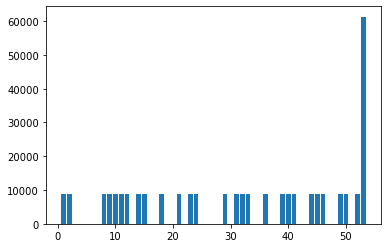

In [36]:
# Barplot. Falta que es tradueixi a quines aules son realment

plt.bar(range(1, 54), classroom_counts) # either 0, 8760, 61320
plt.show()

Predicted

In [43]:
# By season:
seasons = ["spring", "summer", "autumn", "winter"]

season_dfs = {
    "spring_df": optimodel_output[optimodel_output["hour"].between(1920, 3728)],
    "summer_df": optimodel_output[optimodel_output["hour"].between(3728, 6566)],
    "autumn_df": optimodel_output[optimodel_output["hour"].between(6566, 8136)],
    "winter_df": pd.concat([optimodel_output[optimodel_output["hour"] > 8136], optimodel_output[optimodel_output["hour"] < 1920]], axis=0)}

classroom_counts = [0 for _ in range(53)]

season_counts = {}
for season in seasons:
    season_counts[season + "_count"] = classroom_counts.copy()
    for i, r in season_dfs[season + "_df"].iterrows():
        season_counts[season + "_count"][int(r["Assigned"])-1] += 1
        # print(int(r["Assigned"]))


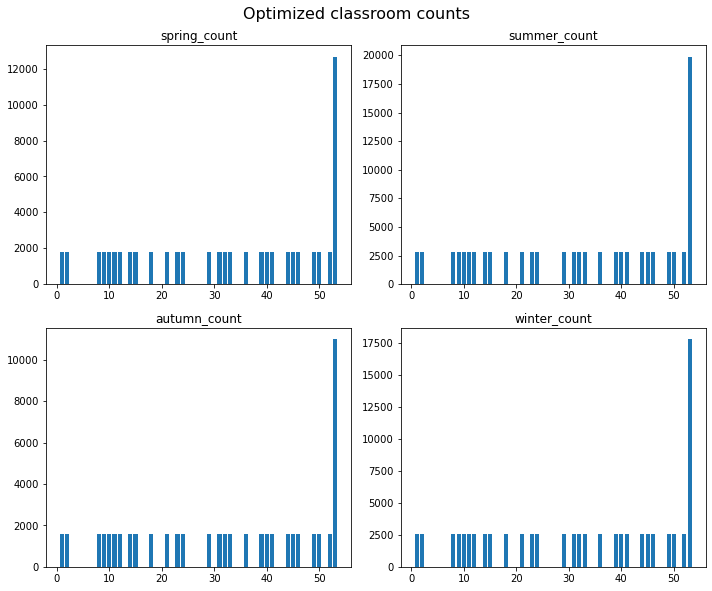

In [47]:

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array
axs = axs.flatten()

# Iterate over the data dictionary and create a bar plot for each figure
for i, (figure, values) in enumerate(season_counts.items()):
    ax = axs[i]  # Select the corresponding subplot
    indices = range(1, len(values)+1)
    ax.bar(indices, values)
    ax.set_title(figure)

# Adjust the spacing between subplots
plt.tight_layout()

# Add a plot title
fig.suptitle("Optimized classroom counts", fontsize=16, y=1.02)

# Show the plot
plt.show()

Real

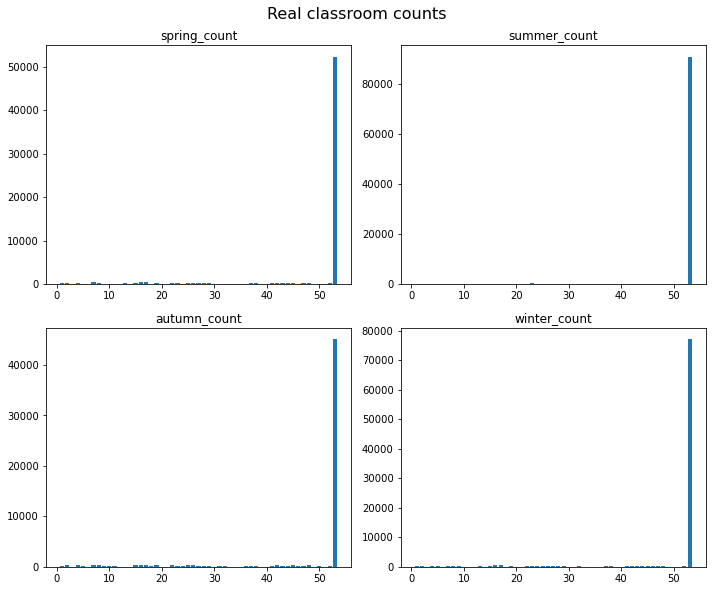

In [49]:
season_counts = {}
for season in seasons:
    season_counts[season + "_count"] = classroom_counts.copy()
    for i, r in season_dfs[season + "_df"].iterrows():
        season_counts[season + "_count"][int(r["Real"])-1] += 1
        # print(int(r["Assigned"]))

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array
axs = axs.flatten()

# Iterate over the data dictionary and create a bar plot for each figure
for i, (figure, values) in enumerate(season_counts.items()):
    ax = axs[i]  # Select the corresponding subplot
    indices = range(1, len(values)+1)
    ax.bar(indices, values)
    ax.set_title(figure)

# Adjust the spacing between subplots
plt.tight_layout()

# Add a plot title
fig.suptitle("Real classroom counts", fontsize=16, y=1.02)

# Show the plot
plt.show()

Real excluding empty class

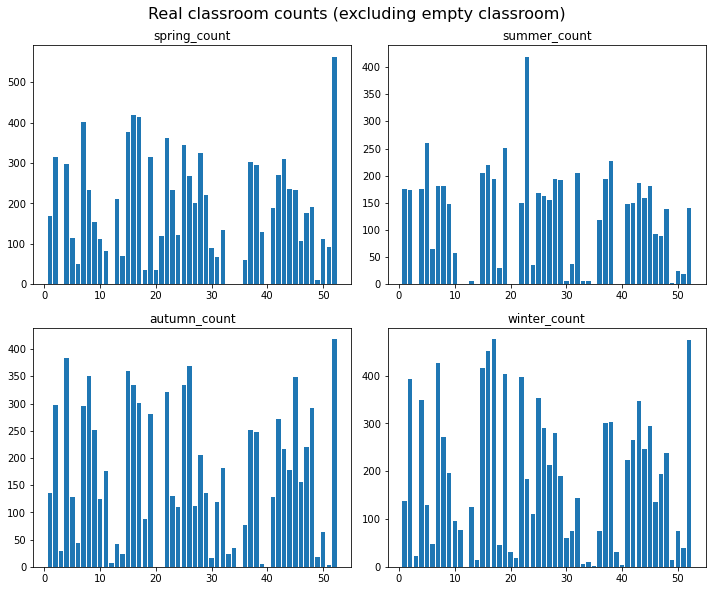

In [53]:
season_counts = {}
for season in seasons:
    season_counts[season + "_count"] = classroom_counts[:-1].copy()
    for i, r in season_dfs[season + "_df"].iterrows():
        if int(r["Real"]) != 53:
            season_counts[season + "_count"][int(r["Real"])-1] += 1
        # print(int(r["Assigned"]))

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array
axs = axs.flatten()

# Iterate over the data dictionary and create a bar plot for each figure
for i, (figure, values) in enumerate(season_counts.items()):
    ax = axs[i]  # Select the corresponding subplot
    indices = range(1, len(values)+1)
    ax.bar(indices, values)
    ax.set_title(figure)

# Adjust the spacing between subplots
plt.tight_layout()

# Add a plot title
fig.suptitle("Real classroom counts (excluding empty classroom)", fontsize=16, y=1.02)

# Show the plot
plt.show()

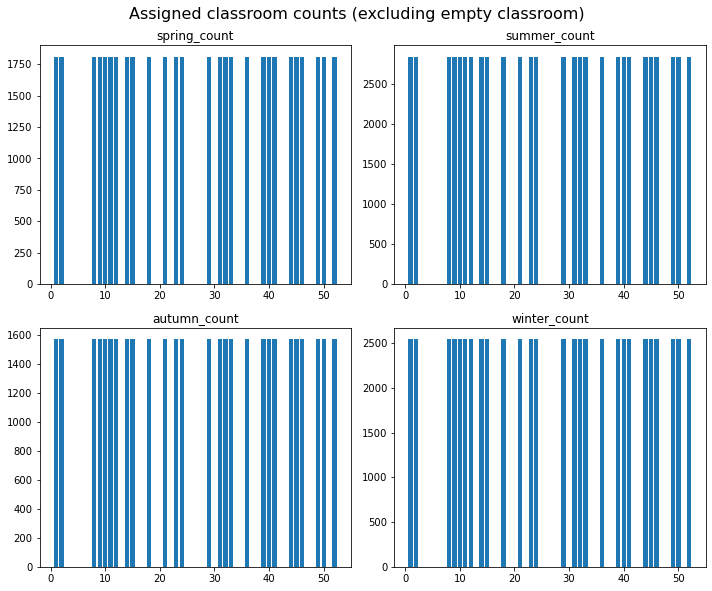

In [56]:
season_counts = {}
for season in seasons:
    season_counts[season + "_count"] = classroom_counts[:-1].copy()
    for i, r in season_dfs[season + "_df"].iterrows():
        if int(r["Assigned"]) != 53:
            season_counts[season + "_count"][int(r["Assigned"])-1] += 1
        # print(int(r["Assigned"]))

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array
axs = axs.flatten()

# Iterate over the data dictionary and create a bar plot for each figure
for i, (figure, values) in enumerate(season_counts.items()):
    ax = axs[i]  # Select the corresponding subplot
    indices = range(1, len(values)+1)
    ax.bar(indices, values)
    ax.set_title(figure)

# Adjust the spacing between subplots
plt.tight_layout()

# Add a plot title
fig.suptitle("Assigned classroom counts (excluding empty classroom)", fontsize=16, y=1.02)

# Show the plot
plt.show()